# Graph Similarity Estimation

This notebook illustrates canonical labelling of a graph, Weisfeiler-Lehman test of isomorphism, and Weisfeiler-Lehman graph kernels.

## Canonical labelling of a graph

This section will show you how to apply the Weisfeiler-Lehman algorithm to a graph.
First, import the class from the package, and the graph you want to label.

In [1]:
from sknetwork.topology import WLColoring, wl_kernel
from sknetwork.data import house

Then, instantiate the class.
You will use it to obtain the labels for your graph.

In [2]:
wlc = WLColoring()
adjacency = house()

To obtain the labelling, we use the fit method.
There is an optional argument for maximum number of iterations.

In [3]:
labels = wlc.fit_transform(adjacency)

The 'labels' list now contains labels for the vertices of the input graph, where
labels[i] is the label of the i-th vertex according to the indices given by adjacency

scikit-network provides a way to represent graphs in the SVG format. You will need a few more imports :

In [4]:
from IPython.display import SVG
from sknetwork.visualization import svg_graph

Next, we gather some extra information that is necessary to the visualization of our graph :

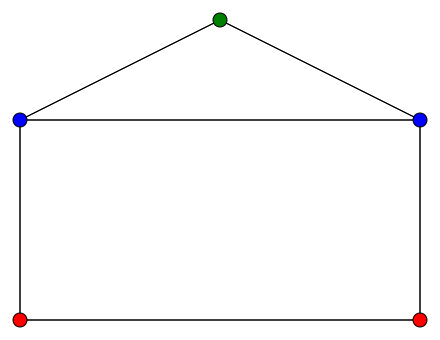

In [5]:
graph = house(metadata=True)
adjacency = graph.adjacency
position = graph.position
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

Note that you can, if you prefer, use the labels as names for the vertices :

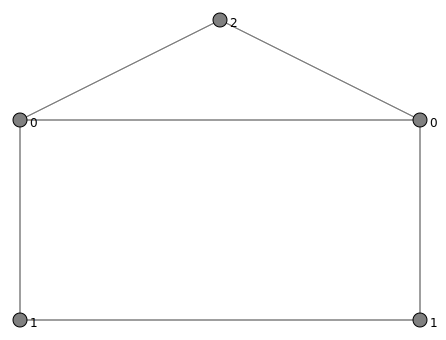

In [6]:
image = svg_graph(adjacency, position, names=labels)
SVG(image)

## Weisfeiler-Lehman Test of Isomorphism

The previous section shows how to find a labelling of vertices of a graph.

The algorithm used
was designed by Weisfeiler and Lehman as a test of isomorphism. In this section,
we will see how to apply it to two graphs to determine wether they are isomorphic or not.

We need to have two adjacency representations of the graphs we want to compare.
From the toy graphs, they can be obtained quite easily :

In [8]:
adjacency_1 = house()
adjacency_2 = house()

Then they can simply be passed as arguments to wl_kernel.
It will return 1 if the graphs are isomorphic, 0 otherwise.


You must specify the number of iterations you want the algorithm to run for.
-1 is the default value, and will make it run as many times as there are vertices.
If after h iterations, the algorithm returns 1, it means either the graphs are isomorphics,
or the algorithm was not able to determine they are not.

In [9]:
similarity = wl_kernel(adjacency_1, adjacency_2, "isomorphism")
print(similarity)

1


##  Weisfeiler-Lehman Kernels

Shervashidze, Schweitzer, van Leeuwen, Mehlhorn, Borgwardt proposed an approach to graph kernels based
on the Weisfeiler-Lehman test of isomorphism. This section will show you how to apply such kernels to your graphs.

We use the same function as previously for the test of isomorphism : only the arguments change.
You can choose either the subtree kernel, or the edge kernel. The former is a lot faster than the latter, as it does not take edges into account.

In [ ]:
adjacency_1 = house()
adjacency_2 = house()
similarity = wl_kernel(adjacency_1, adjacency_2, "subtree")
print(similarity)

The return is an integer that measures the similarity between two graphs.
Note that it is not normalized, and can only be evaluated with respect to a specific graph.
For instance, you can determine how similar graphs A and B are, and then compare that result to
the similarity between graphs A and C.
The similarity is maximal for isomorphic graphs.